# Work Overview

This document aims to show what work I have completed with a mix of actual code and indepth text blocks explaining what I have done. Everything is viewable at 'https://github.com/DJSaunders1997/Masters-Project/'

## Getting Data

Mouse data was downloaded from 'https://github.com/gabysbrain/datasets' as instructed and mouse data found in '/datasets-sa_mouse_tracking/'.

I can't exactly remeber which scripts I ran, some of the seemed to not work and delete all the data but I ended up with a single 'mouse_events.json' file containing all data for the Turk Study data and a folder of 30ish smaller json files such as 'no-sa_2016-12-29 20_48_14-2.json' for the Lab Study.
This data is saved on my gitHub repo under 'All-Data.zip'.

# Exploring the JSON files

I'm unsure how to analyse JSON data directly so next I had to find a way to convert the JSON into a structed more familiar tabular csv format. The Turk Studys 'mouse_events.json' looks like this 

In [1]:
'''
[
  {
    "events": [
      {
        "button": 1,
        "event_type": "mousedown",
        "target": "alloc-slider-1",
        "time": 1417182276985,
        "x": 477,
        "y": 405
      },
      {
        "button": 1,
        "event_type": "mouseup",
        "target": "alloc-slider-1",
        "time": 1417182277096,
        "x": 478,
        "y": 405
      }
    ],
    "step": "1",
    "turkId": "A35YFAFWP33C70"
  },
  ...
  ''';

The Lab study data consists of many files in this format. The mouseevents-events looks the same as the Turk Study other than all the turkIds being set to 0. There is also additional information about the user which is not used to study mouse data so it can be ignored.

In [2]:
'''
{
    "mouseevents-events": "[{\"turkId\":0,\"step\":\"1\",\"events\":[{\"x\":433,\"y\":331, #THIS LINE IS CUT SHORT. TOO LONG TO SHOW ALL#
    "demographics-turk_id": "\"0\"",
    "demographics-assignment_id": "\"ASSIGNMENT_ID_NOT_AVAILABLE\"",
    "demographics-age": "\"17\"",
    "demographics-computer_experience": "\"2\"",
    "demographics-investment_experience": "\"1\"",
    ...
}
'''

'\n{\n    "mouseevents-events": "[{"turkId":0,"step":"1","events":[{"x":433,"y":331, #THIS LINE IS CUT SHORT. TOO LONG TO SHOW ALL#\n    "demographics-turk_id": ""0"",\n    "demographics-assignment_id": ""ASSIGNMENT_ID_NOT_AVAILABLE"",\n    "demographics-age": ""17"",\n    "demographics-computer_experience": ""2"",\n    "demographics-investment_experience": ""1"",\n    ...\n}\n'

# Converting Turk Mouse events into CSV

This is all handled by functions inside of the JSONtoCSV.py file I've created as shown below. 

Can't explain exactly what the functions do as they were written ages ago and need to be recommented properly. The functions also 'normalize' the time field. Rather than the time for each mouse event being recorded in UNIX time, the first mouse event of a user is changed to 0 and the rest of that users mouse events are given in seconds since the first mouse event.

Before running this code the 'Original-Data.zip' file must be unzipped to a folder named 'Original-Data'. It needs to be zipped as the file is too big to be uploaded to github otherwise.

In [3]:
import pandas as pd

from JSONtoCSV import convert_json_to_csv # import function to convert Turk data

# Should take around a minute to process.
#
df_turk = convert_json_to_csv(r'Original-Data\all_turk_study_data\mouse_events.json', 'Turk-Data.csv')
print(f'\n Number of rows: {df_turk.shape[0]} ')
df_turk.head()

1 / 152112 completed A35YFAFWP33C70
10001 / 152112 completed A10WZYTR4O4V6S
20001 / 152112 completed A30OOETQPWFPHK
30001 / 152112 completed A309P6D2ECOLH7
40001 / 152112 completed A2ZH6W3O33PVJZ
50001 / 152112 completed ASB8T0H7L99RF
60001 / 152112 completed A3JI3B5GTVA95F
70001 / 152112 completed AVPKE76DJLWK6
80001 / 152112 completed A1DJD0J0BTE1X8
90001 / 152112 completed A3F3LNKCCXS42L
100001 / 152112 completed A1I20G9FII2FN5
110001 / 152112 completed A3J2CI4J5V3MLP
120001 / 152112 completed A1P8M5BKOTAA8I
130001 / 152112 completed A2QYPEWPAGGKLQ
140001 / 152112 completed A30QJF394U1VRY
150001 / 152112 completed AAOCGTXKZTC8H
Time taken: 38 s

 Number of rows: 1293073 


,button,event_type,target,time,x,y,step,turkId
0,1,mousedown,alloc-slider-1,0.000,477.0,405.0,1,A35YFAFWP33C70
1,1,mouseup,alloc-slider-1,0.111,478.0,405.0,1,A35YFAFWP33C70
2,1,click,alloc-slider-1,0.111,478.0,405.0,1,A35YFAFWP33C70
3,1,mousedown,alloc-slider-1,1.516,479.0,405.0,1,A35YFAFWP33C70
4,1,mousedirchange,alloc-slider-1,2.395,543.0,403.0,1,A35YFAFWP33C70


I've shown that the turk data can be converted, but the lab study is more challenging. This script goes through the files in a given directory looking for JSON files and puts them together into a single dataframe. 

Each individual is also assigned a new turk ID as in the JSON file they're all set to 0. Additionally the file the data came from is appended as a new column so that we can compare sa or no sa in the future if we want to. As before the time is also normilized.

It's worth noteing that the targets are different for the Turk and Lab data. Turk data has items like 'alloc-slider-1' where as Lab data is of the format '[id="alloc-slider-return-4"]>svg>g>circle'. Looks like these just need to be renamed so they match up but some of the Lab data targets are hard to understand. 

In [4]:
from JSONtoCSV import lab_convert_json_to_csv # import function to convert Lab data

# Should take around a minute to process.
#
df_lab = lab_convert_json_to_csv(r'Original-Data\all_lab_study_data', 'Lab-Data.csv')
print(f'\n Number of rows: {df_lab.shape[0]} ')
df_lab.head()

Opening File global_sa_sl_both_2017-02-08 12_48_51.json
1 / 807 completed
201 / 807 completed
401 / 807 completed
601 / 807 completed
801 / 807 completed
Opening File global_sa_sl_both_2017-02-09 17_28_24.json
1 / 1274 completed
201 / 1274 completed
401 / 1274 completed
601 / 1274 completed
801 / 1274 completed
1001 / 1274 completed
1201 / 1274 completed
Opening File global_sa_sl_both_2017-02-09 17_28_30.json
1 / 1274 completed
201 / 1274 completed
401 / 1274 completed
601 / 1274 completed
801 / 1274 completed
1001 / 1274 completed
1201 / 1274 completed
Opening File global_sa_sl_both_2017-02-10 18_16_36.json
1 / 258 completed
201 / 258 completed
Opening File global_sa_sl_both_2017-02-13 11_15_26.json
1 / 282 completed
201 / 282 completed
Opening File global_sa_sl_both_2017-02-13 11_50_43.json
1 / 314 completed
201 / 314 completed
Opening File global_sa_sl_both_2017-02-15 17_28_32.json
1 / 1169 completed
201 / 1169 completed
401 / 1169 completed
601 / 1169 completed
801 / 1169 completed

,button,event_type,target,time,x,y,step,turkId,file
0,1,mousedown,"[id=""alloc-slider-return-4""]>svg>g>circle",0.000000,397.0,647.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
1,1,mouseup,"[id=""alloc-slider-return-4""]>svg>g>circle",0.547000,423.0,642.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
2,1,click,"[id=""alloc-slider-return-4""]>svg>g>circle",0.547000,423.0,642.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
3,1,mousedown,"[id=""alloc-slider-return-4""]>svg>g>circle",1.176995,426.0,642.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json
4,1,mousedirchange,"[id=""alloc-slider-return-4""]>svg>g>circle",1.790000,440.0,640.0,1,ID1,global_sa_sl_both_2017-02-08 12_48_51.json


We now have the 1,293,073 rows of Turk data and the 58,285 rows of Lab data in a format we can work with. Now some initial exploration of the data can begin.

# Initial Data Exploration

Focusing first on the Turk data get some ideas of whats happening in the data.

In [5]:
# Number of users for each dataset
print(f"Turk Number of unique Ids = { len(df_turk['turkId'].unique()) }")
print(f"Lab  Number of unique Ids = { len(df_lab['turkId'].unique()) } \n")

# Find largest mouse position
print( f"Turk Largest x = { df_turk['x'].max() }, y = { df_turk['y'].max() } " )
print( f"Lab  Largest x = { df_lab['x'].max() }, y = { df_lab['y'].max() } " )



Turk Number of unique Ids = 461
Lab  Number of unique Ids = 18 

Turk Largest x = 1879.0, y = 2344.0 
Lab  Largest x = 1913.0, y = 1355.0 


We can see that the Turk data contains many more individuals than the Lab data. To make the initial exploration easier I will take a small subset of the Turk data of roughly equal size to the Lab data.

In [6]:
# Get first 18 Ids from Turk Data
firstIds = df_turk['turkId'].unique()[:18]
df_turk_small = df_turk[ df_turk['turkId'].isin(firstIds) ]

print(f"Turk_small Number of unique Ids = { len(df_turk_small['turkId'].unique()) }")

df_turk_small

Turk_small Number of unique Ids = 18


,button,event_type,target,time,x,y,step,turkId
0,1,mousedown,alloc-slider-1,0.000,477.0,405.0,1,A35YFAFWP33C70
1,1,mouseup,alloc-slider-1,0.111,478.0,405.0,1,A35YFAFWP33C70
2,1,click,alloc-slider-1,0.111,478.0,405.0,1,A35YFAFWP33C70
3,1,mousedown,alloc-slider-1,1.516,479.0,405.0,1,A35YFAFWP33C70
4,1,mousedirchange,alloc-slider-1,2.395,543.0,403.0,1,A35YFAFWP33C70
...,...,...,...,...,...,...,...,...
24186,1,click,html > body > main > div#content > form#portfo...,183.109,617.0,1194.0,1,A166A2M31CW2C7
24187,1,click,html > body > main > div#content > form#portfo...,183.109,617.0,1194.0,2,A166A2M31CW2C7
24188,1,click,html > body > main > div#content > form#portfo...,183.109,617.0,1194.0,3,A166A2M31CW2C7
24189,1,click,html > body > main > div#content > form#portfo...,183.109,617.0,1194.0,4,A166A2M31CW2C7


# Viewing Mouse Paths

He I aim to visualise the paths a users mouse has taken over the course of the task. Maybe we could see that the lab mouse data is more messy if theyre constantly tweaking the results, but turk data may be neater as they don't mess around as much.

These initial results don't see to reveal too much.
 
TODO maybe in the future save these plots as images feed into a CNN just to see what happens? 

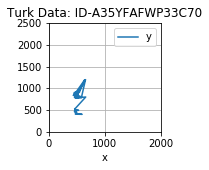

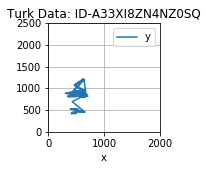

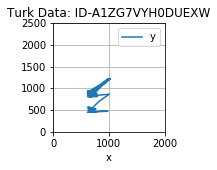

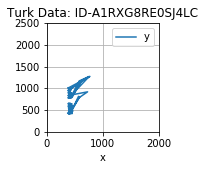

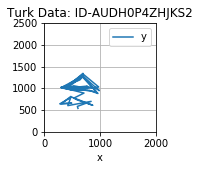

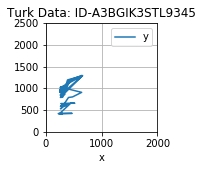

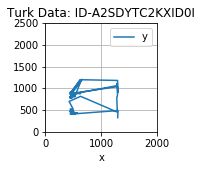

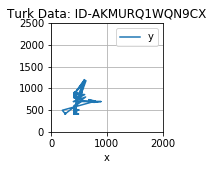

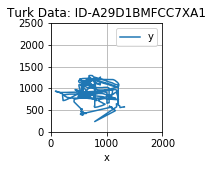

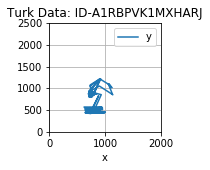

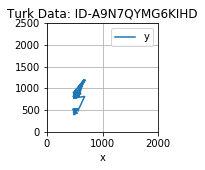

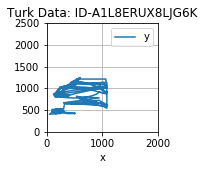

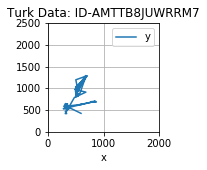

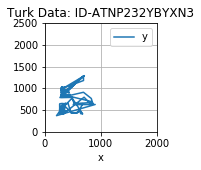

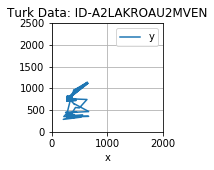

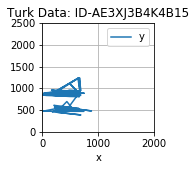

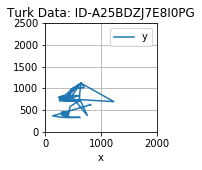

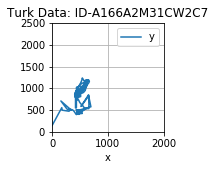

In [7]:
# View paths of Smaller Turk Data

import matplotlib.pyplot as plt

turk_small_Ids = df_turk_small['turkId'].unique()

for ID in turk_small_Ids:
    title_format = f'Turk Data: ID-{ID}'
    df_turk_small[ df_turk_small['turkId'] == ID ].plot(kind='line', x ='x', y='y', grid=True, xlim=[0,2000], ylim=[0,2500], figsize=(2,2), title=title_format)

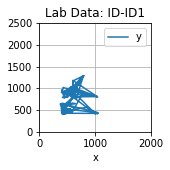

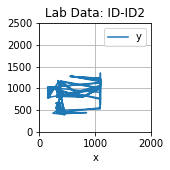

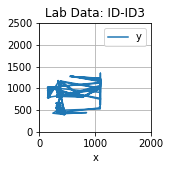

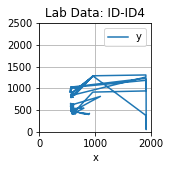

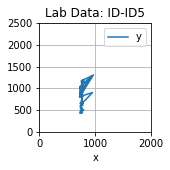

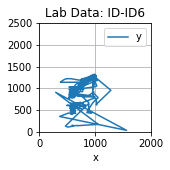

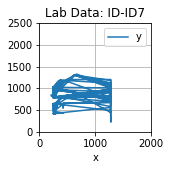

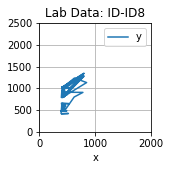

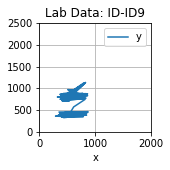

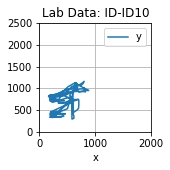

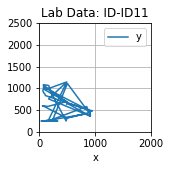

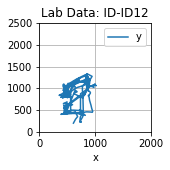

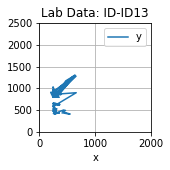

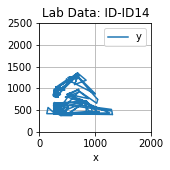

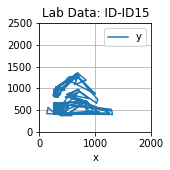

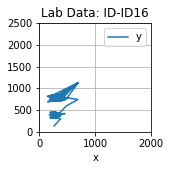

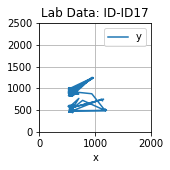

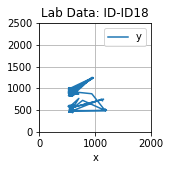

In [8]:
# View paths of Lab Data

lab_Ids = df_lab['turkId'].unique()

for ID in lab_Ids:
    title_format = f'Lab Data: ID-{ID}'
    df_lab[ df_lab['turkId'] == ID ].plot(kind='line', x ='x', y='y', grid=True, xlim=[0,2000], ylim=[0,2500], figsize=(2,2), title=title_format)

# Comparing Steps

Every mouse event in the datasets have a step from 1 to 5. Perhaps looking at how many events are in each step would reveal some differences in Turk or Lab data? Lab users may have a high number of events for the first few steps but have a lower number of events by the last step as they get more used to the task. Turk users may constantly have a low number of mouse events for each step as they don't pay attention.

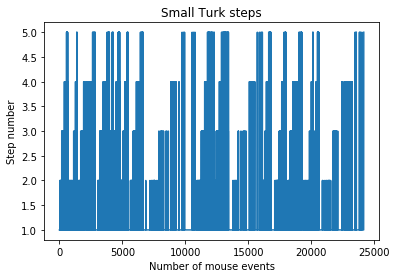

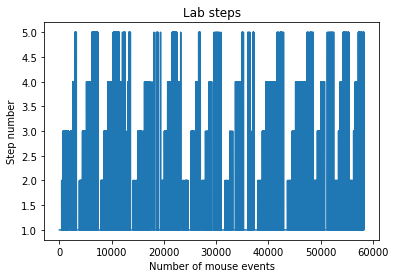

In [9]:
df_turk_small['step'].plot(title='Small Turk steps')
plt.xlabel('Number of mouse events')
plt.ylabel('Step number')
plt.show()

df_lab['step'].plot(title='Lab steps')
plt.xlabel('Number of mouse events')
plt.ylabel('Step number')
plt.show()

For the same number of users there seems to be twice as many events with the lab data, are we on to something?

TODO Try steps over time to see if this reveals more.

# Time

Attempt to see if there is any difference in time of the lab and turk data.

In [10]:
# Ordering all the Turks by the total time taken we can see that 2 rows have 10^12 seconds and one row took 0s.
# Remove these records as they cannot be correct.
print(df_turk.groupby('turkId').time.max().sort_values(ascending = False))

# Remove reccords from all Turk data, and small turk data
df_turk = df_turk[ (df_turk.turkId!='A21Y22J7Q0KSGN') & (df_turk.turkId!='AKMURQ1WQN9CX') &(df_turk.turkId!='A18TCR555RWUZV') ]

df_turk_small = df_turk_small[ (df_turk_small.turkId!='A21Y22J7Q0KSGN') & (df_turk_small.turkId!='AKMURQ1WQN9CX') & (df_turk.turkId!='A18TCR555RWUZV')]


turkId
AKMURQ1WQN9CX     1.415765e+12
A21Y22J7Q0KSGN    1.415606e+12
A16DELN8V1CH9R    2.052240e+03
A32S54OU6YX0RL    1.591131e+03
A29ERTCD6HF72I    1.160752e+03
                      ...     
A244267S3IML6R    5.680200e+01
A3EPQK7C1KO6P3    5.473700e+01
A1GIA6WCGRJRY7    3.447700e+01
A3U3CCIR1ZXEOR    2.062500e+01
A18TCR555RWUZV    0.000000e+00
Name: time, Length: 461, dtype: float64
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [11]:
# Remove users as they have a time of 1,415,605,709,647.55s and 1,415,764,970,154.82s which must mean something went wrong in the calculations somewhere

small_turk_times = df_turk_small.groupby('turkId').time.max().mean()
print(f'First 18 Turk average time to complete tasks: {small_turk_times} seconds\n')

turk_times = df_turk.groupby('turkId').time.max().mean()
print(f'All 400ish Turk average time to complete tasks: {turk_times} seconds\n')

lab_times = df_lab.groupby('turkId').time.max().mean()
print(f'Lab average time to complete tasks: {lab_times} seconds\n')


First 18 Turk average time to complete tasks: 226.28929411764705 seconds

All 400ish Turk average time to complete tasks: 333.2305764192138 seconds

Lab average time to complete tasks: 442.55768000000006 seconds



# Time Visualisations

This shows some interesting results.
It appears that, on average, a Lab user will take almost 2 minutes more to complete the tasks.
See if we can visualise this as Data Visualisation is amazing and important :)


In [13]:
import numpy as np

# Data will be the total time taken for a user to complete the tasks.
turk_data = df_turk.groupby('turkId').time.max().to_numpy()
lab_data  = df_lab.groupby('turkId').time.max().to_numpy()
all_data = np.append( turk_data, lab_data )

# Labels will be 1 for turk data and 0 for lab data
labels = np.append( np.ones(len(turk_data)), np.zeros(len(lab_data)) )

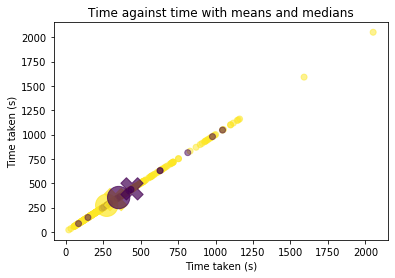

In [14]:
#
plt.scatter(all_data, all_data, c=labels, alpha=0.5 )

plt.scatter( ( turk_data.mean(),lab_data.mean() ), ( turk_data.mean(),lab_data.mean() ), marker='X', c=[1,0], s=500, alpha=0.7 )

plt.scatter( ( np.median(turk_data), np.median(lab_data) ), ( np.median(turk_data), np.median(lab_data) ), marker='o', c=[1,0], s=500, alpha=0.7 )

plt.xlabel('Time taken (s)')
plt.ylabel('Time taken (s)')
plt.title('Time against time with means and medians')
plt.show()

The plot has shown us that while there is a difference in mean and median between the 2 groups they do not form clusters that could be used for classification purposes from just the time data.

Now create a 2D plot to see if the points can be better seperated.

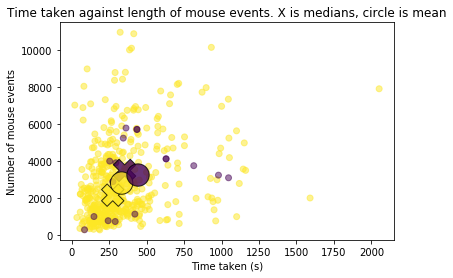

In [89]:
# Get number of mouse events data.

count_lab = df_lab.groupby('turkId').time.count().to_numpy()
count_turk = df_turk.groupby('turkId').time.count().to_numpy()
count_data = np.append( count_turk, count_lab )

# plot
plt.scatter(all_data, count_data, c=labels, alpha=0.5)
plt.scatter( ( np.median(turk_data),np.median(lab_data) ), ( np.median(count_turk),np.median(count_lab) ), marker='X', c=[1,0], s=500, alpha=0.8, edgecolors='black' )
plt.scatter( ( np.mean(turk_data),np.mean(lab_data) ), ( np.mean(count_turk),np.mean(count_lab) ), marker='o', c=[1,0], s=500, alpha=0.8, edgecolors='black' )

plt.title('Time taken against length of mouse events. X is medians, circle is mean')
plt.xlabel('Time taken (s)')
plt.ylabel('Number of mouse events')
plt.show()

Pearsons correlation: 0.286
Coefficients: 2.453243501223236
Intercept: 1995.2821781196644
Equation of the line in for y=m*X+c = y=2.453243501223236*X1995.2821781196644 


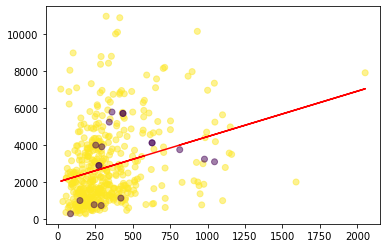

In [97]:
# It looks like the time taken and number of mouse events are not correlated.
# This is surprising.
# Calculate pearsons correlation to see correlation.
# Need value of 0.5 or above to show correlation.
# 0.286 shows strongly no correlation.

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

corr, _ = pearsonr(all_data, count_data)
print('Pearsons correlation: %.3f' % corr)

# Now plot a linear Regression to explain results visually
reg = LinearRegression().fit(all_data.reshape(-1,1), count_data.reshape(-1,1))

print(f'Coefficients: {reg.coef_[0][0]}')
print(f'Intercept: {reg.intercept_[0]}')
print(f'Equation of the line in for y=m*X+c = y={reg.coef_[0][0]}*X{reg.intercept_[0]} ')

plt.scatter(all_data, count_data, c=labels, alpha=0.5)
plt.title('Showing linear regression')
#intercept, slope, corr_coeff = plot_linear_regression(X, y)
plt.plot(all_data.reshape(-1,1), reg.coef_[0][0]*all_data.reshape(-1,1)+reg.intercept_[0], 'r')

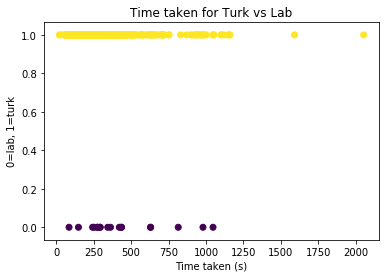

Text(0, 0.5, '0=lab, 1=turk')

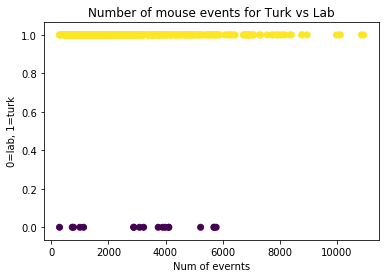

In [84]:
#x = np.append(all_data, labels, axis=1)
time = np.vstack((all_data, labels))

plt.scatter(time[0], time[1], c=labels)
plt.title('Time taken for Turk vs Lab')
plt.xlabel('Time taken (s)')
plt.ylabel('0=lab, 1=turk')
plt.show()

count = np.vstack((count_data, labels))

plt.scatter(count[0], count[1], c=labels)
plt.title('Number of mouse events for Turk vs Lab')
plt.xlabel('Num of evernts')
plt.ylabel('0=lab, 1=turk')


# Initial Machine Learning Techniques
After the data visualisations it doesn't appear we can tell the difference between the Turk or Lab data from these plotted attributes. 

Regardless a Support Vector Machine was tried to see if it could classify a test datapoint to either Turk or Lab data.

In [16]:
# TODO deal with imbalenced data
# We have uneven class sizes. 18 vs 400ish

# https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
# https://machinelearningmastery.com/what-is-imbalanced-classification/

# TODO techniques listed here Resampling?

# TODO compair any classifier I create with a baseline model: https://towardsdatascience.com/from-sklearn-import-478c711dafa1


SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[[ 18   0]
 [  0 458]]


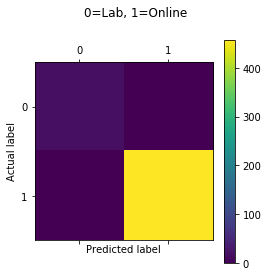

Accuracy: 0.7121848739495799
Precision: 0.9819819819819819
Recall: 0.7139737991266376


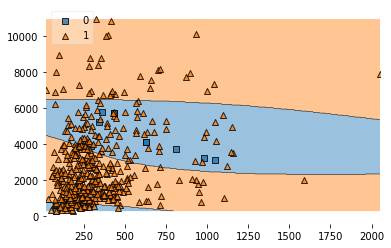

In [17]:
from sklearn import svm
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions

# We will be trying the 2 attributes time vs mouse events
X = np.column_stack((all_data, count_data))
y = labels  # 0 is lab, 1 is online
# TODO split into training and testing data in the future, but for now we will just test with the training set.


clf = svm.SVC(C=10, kernel='rbf', class_weight='balanced') # Linear Kernel
print(clf.fit(X, y) )
y_pred = clf.predict(X)

cm = metrics.confusion_matrix(y, y)
print(cm)
plt.matshow(cm)
plt.suptitle('0=Lab, 1=Online')
plt.colorbar()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

plot_decision_regions(X=X, y=y.astype(np.integer), clf=clf, legend=2)

print("Accuracy:", metrics.accuracy_score(y, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y, y_pred))

Number of lab data in train:  14
Number of lab data in test:  4

SVC(C=100, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[[ 1  3]
 [44 95]]


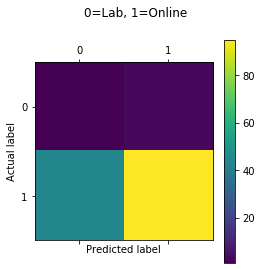

Accuracy: 0.6713286713286714
Precision: 0.9693877551020408
Recall: 0.6834532374100719


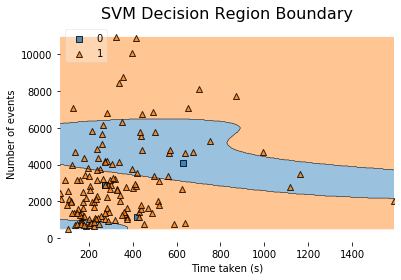

In [18]:
# Try SVM with test / train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100) # 70% training and 30% test

print('Number of lab data in train: ', np.count_nonzero( y_train == 0) )
print('Number of lab data in test: ', np.count_nonzero( y_test == 0) )
print()

#try SVM
clf2 = svm.SVC(C=100, kernel='rbf', class_weight='balanced') # Linear Kernel
print(clf2.fit(X_train, y_train) )
y_pred = clf2.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
plt.matshow(cm)
plt.suptitle('0=Lab, 1=Online')
plt.colorbar()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

plot_decision_regions(X=X_test, y=y_test.astype(np.integer), clf=clf2, legend=2)
#plt.scatter(lab_data, count_lab, c='purple', alpha=0.5, label='Lab')
#plt.scatter(X_train[:], X_train[:], c='purple', alpha=0.5, label='Lab')
plt.xlabel('Time taken (s)')
plt.ylabel('Number of events')
plt.title('SVM Decision Region Boundary', size=16)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

# N-Grams

Try and understand how ngrams work and how they may be used in this project.

In [19]:
import ngram as ng
# or 
from nltk.util import ngrams    #   https://kite.com/python/docs/nltk.ngrams
import nltk

print(list(ngrams([1,2,3,3,3,4,5,3,3,3,3], 2)))
bigram_fd = nltk.FreqDist(ngrams([1,2,3,3,3,4,5,3,3,3,3], 2))
common = bigram_fd.most_common()

print(common)

df_bigram = pd.DataFrame(common, columns =['Bi-gram', 'Frequency'])
df_bigram

[(1, 2), (2, 3), (3, 3), (3, 3), (3, 4), (4, 5), (5, 3), (3, 3), (3, 3), (3, 3)]
[((3, 3), 5), ((1, 2), 1), ((2, 3), 1), ((3, 4), 1), ((4, 5), 1), ((5, 3), 1)]


,Bi-gram,Frequency
0,"(3, 3)",5
1,"(1, 2)",1
2,"(2, 3)",1
3,"(3, 4)",1
4,"(4, 5)",1
5,"(5, 3)",1


In [59]:
# TODO do this for all turk data and get an average out the distributions.
#       do the same for lab data then we can see if the distributions change.
#            TODO rename lab data targets first

def calculate_ngrams(dataframe, n):
    # TODO docstring
    # will return a dataframe of ngrams and frequency given n
    # Can take a while to compute
    
    IDs = dataframe['turkId'].unique()
    #all_ngrams = []
    for ID in IDs:
        # Get targets of each user
        targets = dataframe[ dataframe['turkId'] == ID ] ['target'].to_numpy()

        grams = nltk.FreqDist(ngrams(targets,n))
        common_ngrams = grams.most_common()

        #all_ngrams.append(common_ngrams)

    # Convert list to dataframe
    # Changed from all_ngrams to common_ngrams
    df_ngrams = pd.DataFrame(common_ngrams, columns =['n-grams', 'Frequency'])

    # Sum the frequencies of similar ngrams.
    df_ngrams.groupby(['n-grams']).sum().reset_index().sort_values(by='Frequency', ascending=False)
    # 'Normalise' the frequencies to compare lab and turk.
    df_ngrams['Relative Frequency'] = df_ngrams['Frequency'].divide(len(IDs))
    return df_ngrams

In [61]:
df_lab_bigrams = calculate_ngrams(df_lab, 1)
df_lab_bigrams

,n-grams,Frequency,Relative Frequency
0,"(alloc-slider-2,)",1001,55.611111
1,"(alloc-slider-3,)",585,32.500000
2,"(alloc-slider-5,)",451,25.055556
3,"(alloc-slider-4,)",394,21.888889
4,"(alloc-slider-1,)",354,19.666667
5,"([id=""portfolio-selection""]>div:nth-child(3)>d...",60,3.333333
6,"([id=""portfolio-stats""]>svg,)",20,1.111111
7,"([id=""portfolio-selection""]>div:nth-child(1)>d...",10,0.555556
8,"([id=""portfolio-selection""]>div:nth-child(1)>d...",6,0.333333
9,"(risk-return,)",3,0.166667


In [63]:
# TODO Rename targets so that they're shorter and match lab study.
df_turk_bigrams = calculate_ngrams(df_turk, 1)
df_turk_bigrams

,n-grams,Frequency,Relative Frequency
0,"(portfolio-stats,)",774,1.689956
1,(html > body > main > div#content > form#portf...,695,1.517467
2,(html > body > main > div#content > form#portf...,617,1.347162
3,(html > body > main > div#content > form#portf...,585,1.277293
4,(html > body > main > div#content > form#portf...,394,0.860262
5,(html > body > main > div#content > form#portf...,238,0.519651
6,(html > body > main > div#content > form#portf...,199,0.434498
7,(html > body > main > div#content > form#portf...,109,0.237991
8,(html > body > main > div#content > form#portf...,99,0.216157
9,(html > body > main > div#content > form#portf...,97,0.211790


In [ ]:
df_lab_ngrams = calculate_ngrams(df_lab, 5)
df_turk_ngrams = calculate_ngrams(df_turk, 5)